In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
#Read in dataset
data = pd.read_csv("C:/Users/boots/OneDrive/Documents/AsteroidProject/dataset.csv")

C:\Users\boots\AppData\Local\Temp\ipykernel_4204\72977182.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/boots/OneDrive/Documents/AsteroidProject/dataset.csv")


In [4]:
#Checking for NaN values
check_nan = data.isnull().values.any()
print(check_nan)

True


In [5]:
#Using a copy of data for data saftey
df = data.copy()

In [6]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


C:\Users\boots\AppData\Local\Temp\ipykernel_4204\504436308.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))


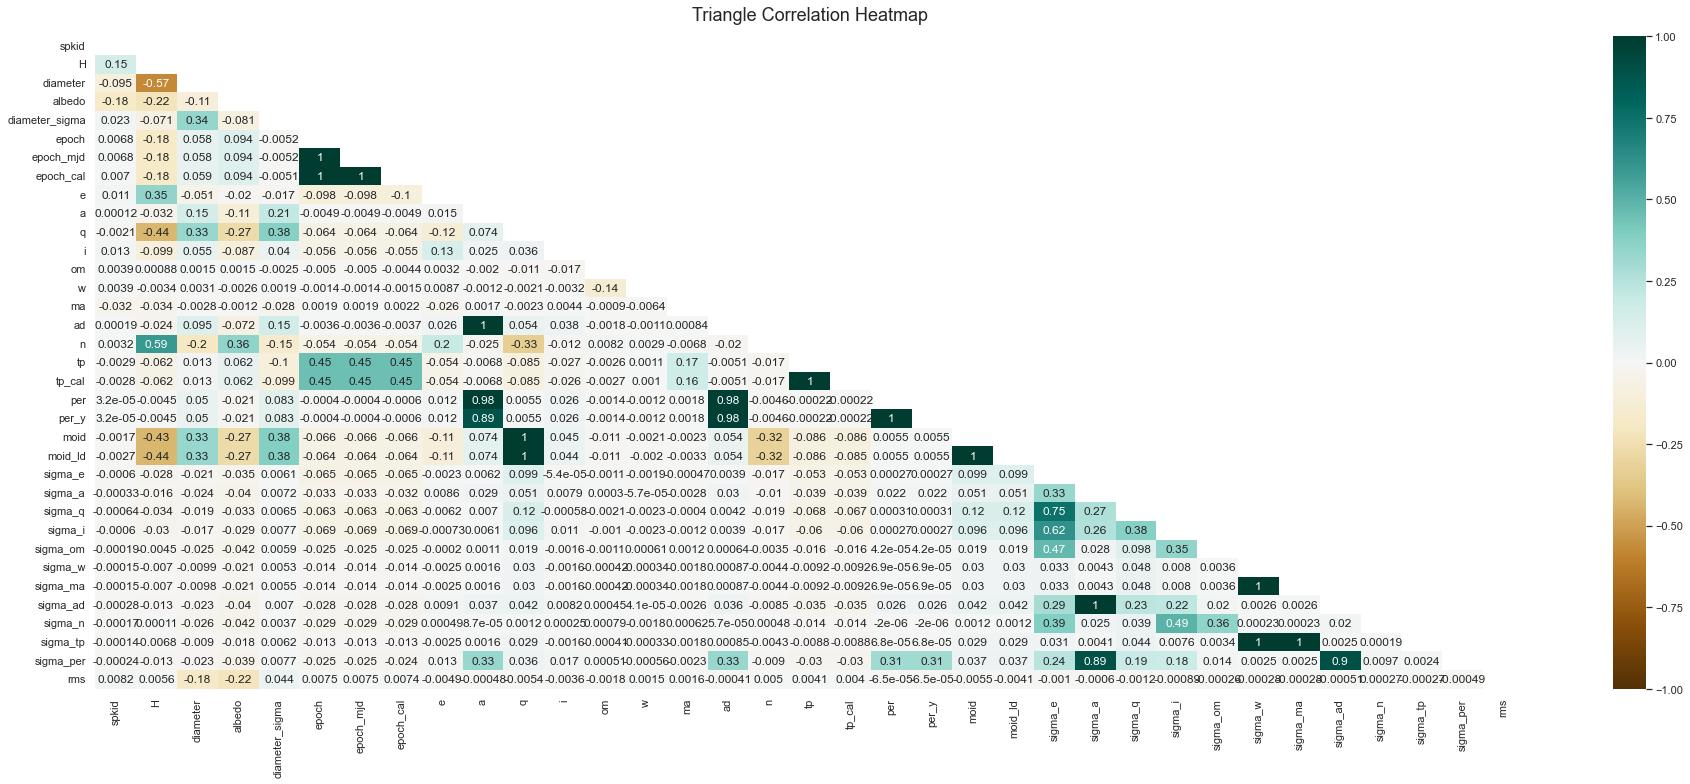

In [7]:
#Correlation matrix
plt.figure(figsize = (32,12))
corr_matrix = df.corr()
#Define the mask to set the values in the upper triangle to true
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
heatmap = sns.heatmap(corr_matrix, mask = mask,
                      vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict = {'fontsize':18}, pad = 16);
#plt.savefig('Correlation_Plot')

In [8]:
#Dropping Unneeded columns
df = df.drop(['id','spkid','full_name','pdes','name','prefix','orbit_id',
              'epoch_mjd','epoch_cal','tp_cal','per_y','moid_ld'
              ,'sigma_ad','sigma_tp','sigma_per','equinox','class'], axis = 1)

In [9]:
df_pred = df.copy()
df_pred = df_pred.drop(['pha'], axis = 1)

In [10]:
df_pred.head()

,neo,H,diameter,albedo,diameter_sigma,epoch,e,a,q,i,...,moid,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_n,rms
0,N,3.40,939.400,0.0900,0.200,2458600.5,0.076009,2.769165,2.558684,10.594067,...,1.59478,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.196500e-12,0.43301
1,N,4.20,545.000,0.1010,18.000,2459000.5,0.229972,2.773841,2.135935,34.832932,...,1.23429,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.653600e-10,0.35936
2,N,5.33,246.596,0.2140,10.594,2459000.5,0.256936,2.668285,1.982706,12.991043,...,1.03429,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.413400e-10,0.33848
3,N,3.00,525.400,0.4228,0.200,2458600.5,0.088721,2.361418,2.151909,7.141771,...,1.13948,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,2.612500e-10,0.39980
4,N,6.90,106.699,0.2740,3.140,2459000.5,0.190913,2.574037,2.082619,5.367427,...,1.09575,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,5.522700e-10,0.52191


In [11]:
df.neo.replace(('Y','N'),(1,0), inplace = True)
df.pha.replace(('Y','N'),(1,0), inplace = True)

In [12]:
df_pred.neo.replace(('Y','N'),(1,0), inplace = True)

In [13]:
df_pred['neo'].unique()

array([ 0.,  1., nan])

In [14]:
df['neo'].unique()
df['pha'].unique()

array([ 0.,  1., nan])

In [15]:
check_nan = data.isnull().values.any()
print(check_nan)

True


In [16]:
#Dropping any rows with Null values
df = df.dropna()

In [17]:
df_pred = df_pred.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131142 entries, 0 to 909489
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   neo             131142 non-null  float64
 1   pha             131142 non-null  float64
 2   H               131142 non-null  float64
 3   diameter        131142 non-null  float64
 4   albedo          131142 non-null  float64
 5   diameter_sigma  131142 non-null  float64
 6   epoch           131142 non-null  float64
 7   e               131142 non-null  float64
 8   a               131142 non-null  float64
 9   q               131142 non-null  float64
 10  i               131142 non-null  float64
 11  om              131142 non-null  float64
 12  w               131142 non-null  float64
 13  ma              131142 non-null  float64
 14  ad              131142 non-null  float64
 15  n               131142 non-null  float64
 16  tp              131142 non-null  float64
 17  per       

In [19]:
check_nan = df.isnull().values.any()
print(check_nan)

False


In [20]:
check_nan = df_pred.isnull().values.any()
print(check_nan)

False


In [21]:
#Take a look at the target variable pha
df['pha'].value_counts()

0.0    130961
1.0       181
Name: pha, dtype: int64

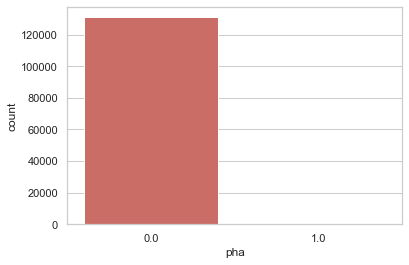

In [22]:
#Plot for Potential Hazardous Asteroid
sns.countplot(x = 'pha', data = df, palette = 'hls')
plt.show()
#plt.savefig('pha_plot')

In [23]:
#Looking at the ratio of Potentially Hazardous to Not Hazardous
count_no_risk = len(df[df['pha'] == 0])
count_haz = len(df[df['pha'] == 1])
pct_no_risk = count_no_risk/(count_no_risk + count_haz)
print("Percentage of asteroids that do not pose a risk towards Earth", pct_no_risk * 100)
pct_haz = count_haz/(count_no_risk + count_haz)
print("Percentage of asteroids that are potentially hazardous", pct_haz * 100)

Percentage of asteroids that do not pose a risk towards Earth 99.8619816687255
Percentage of asteroids that are potentially hazardous 0.13801833127449634


Visualizations

In [24]:
#Plotting relationship between Asteroid Diameter and PHA status
'''%matplotlib inline
pd.crosstab(df.diameter,df.pha).plot(kind = 'bar')
plt.title('PHA Frequency')
plt.xlabel('Diameter')
plt.ylabel('Frequency of PHA')
#plt.savefig('Diameter_PHA_bar')
'''

"%matplotlib inline\npd.crosstab(df.diameter,df.pha).plot(kind = 'bar')\nplt.title('PHA Frequency')\nplt.xlabel('Diameter')\nplt.ylabel('Frequency of PHA')\n#plt.savefig('Diameter_PHA_bar')\n"

In [25]:
#Plotting relationship between NEO and PHA
#table = pd.crosstab(df.neo,df.pha)
#table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
#plt.title('Stacked Bar Chart of NEO vs PHA')
#plt.xlabel('NEO')
#plt.ylabel('PHA')
#plt.savefig('NEO_vs_PHA')

Training the data

In [26]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

def select_features(X_train, y_train, X_test):
    #Configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators = 1000), max_features = 5)
    #Learn relationship from training data
    fs.fit(X_train, y_train)
    #Transform train input data
    X_train_fs = fs.transform(X_train)
    #Transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [27]:
#split dataset in features and target variable
#feature_cols = ['neo','H','diameter','albedo','e','q']
#X = df[feature_cols] # Features
X = df_pred
y = df['pha'] # Target variable

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

#Feature Selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Fitting the Logistic Regression Model

In [28]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression(random_state=16)
logreg = LogisticRegression(solver = 'liblinear') #Test

# fit the model with data
logreg.fit(X_train_fs, y_train)

y_pred = logreg.predict(X_test_fs)

#Evaluate model predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' %(accuracy*100)) 

Accuracy: 99.88


In [29]:
#Checking which features were selected by the random forest classification
selected_feature = X.columns[(fs.get_support())]
selected_feature

Index(['neo', 'H', 'diameter', 'q', 'moid'], dtype='object')

In [30]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[32741,     1],
       [   38,     6]], dtype=int64)

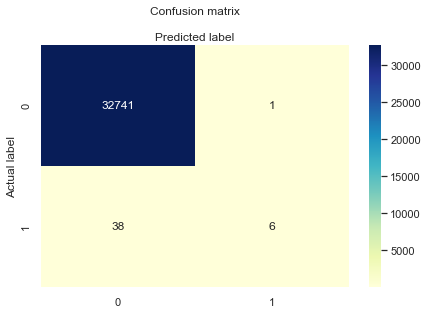

<Figure size 432x288 with 0 Axes>

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
plt.savefig('confusion_mat')

In [32]:
#Testing the accuracy of the Logistic Regression model
from sklearn.metrics import classification_report
target_names = ['No risk', 'PHA']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     No risk       1.00      1.00      1.00     32742
         PHA       0.86      0.14      0.24        44

    accuracy                           1.00     32786
   macro avg       0.93      0.57      0.62     32786
weighted avg       1.00      1.00      1.00     32786



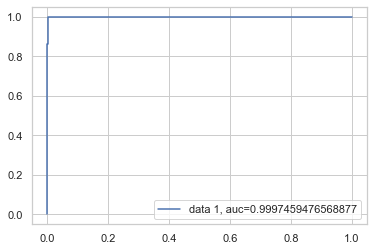

In [33]:
#ROC Curve
y_pred_proba = logreg.predict_proba(X_test_fs)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
#plt.savefig('roc')

Random Forest Algorithm

In [34]:
#Assigning features to X and target variable to y
X = df_pred
y = df.pha

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((91799, 27), (39343, 27))

In [35]:
#Fitting random forest to data
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=1, max_depth=5,
                                      n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

#Checking the oob score
classifier_rf.oob_score_

0.9998365995272279

In [43]:
#Hyperparameter tuning for Random Forest using GridSearchCV and fit the data
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

#Classifier Pipeline
"""pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])"""

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

#Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv=4,
                          n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [44]:
print(grid_search.best_score_)

rf_best = grid_search.best_estimator_
rf_best

0.999880173342595


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

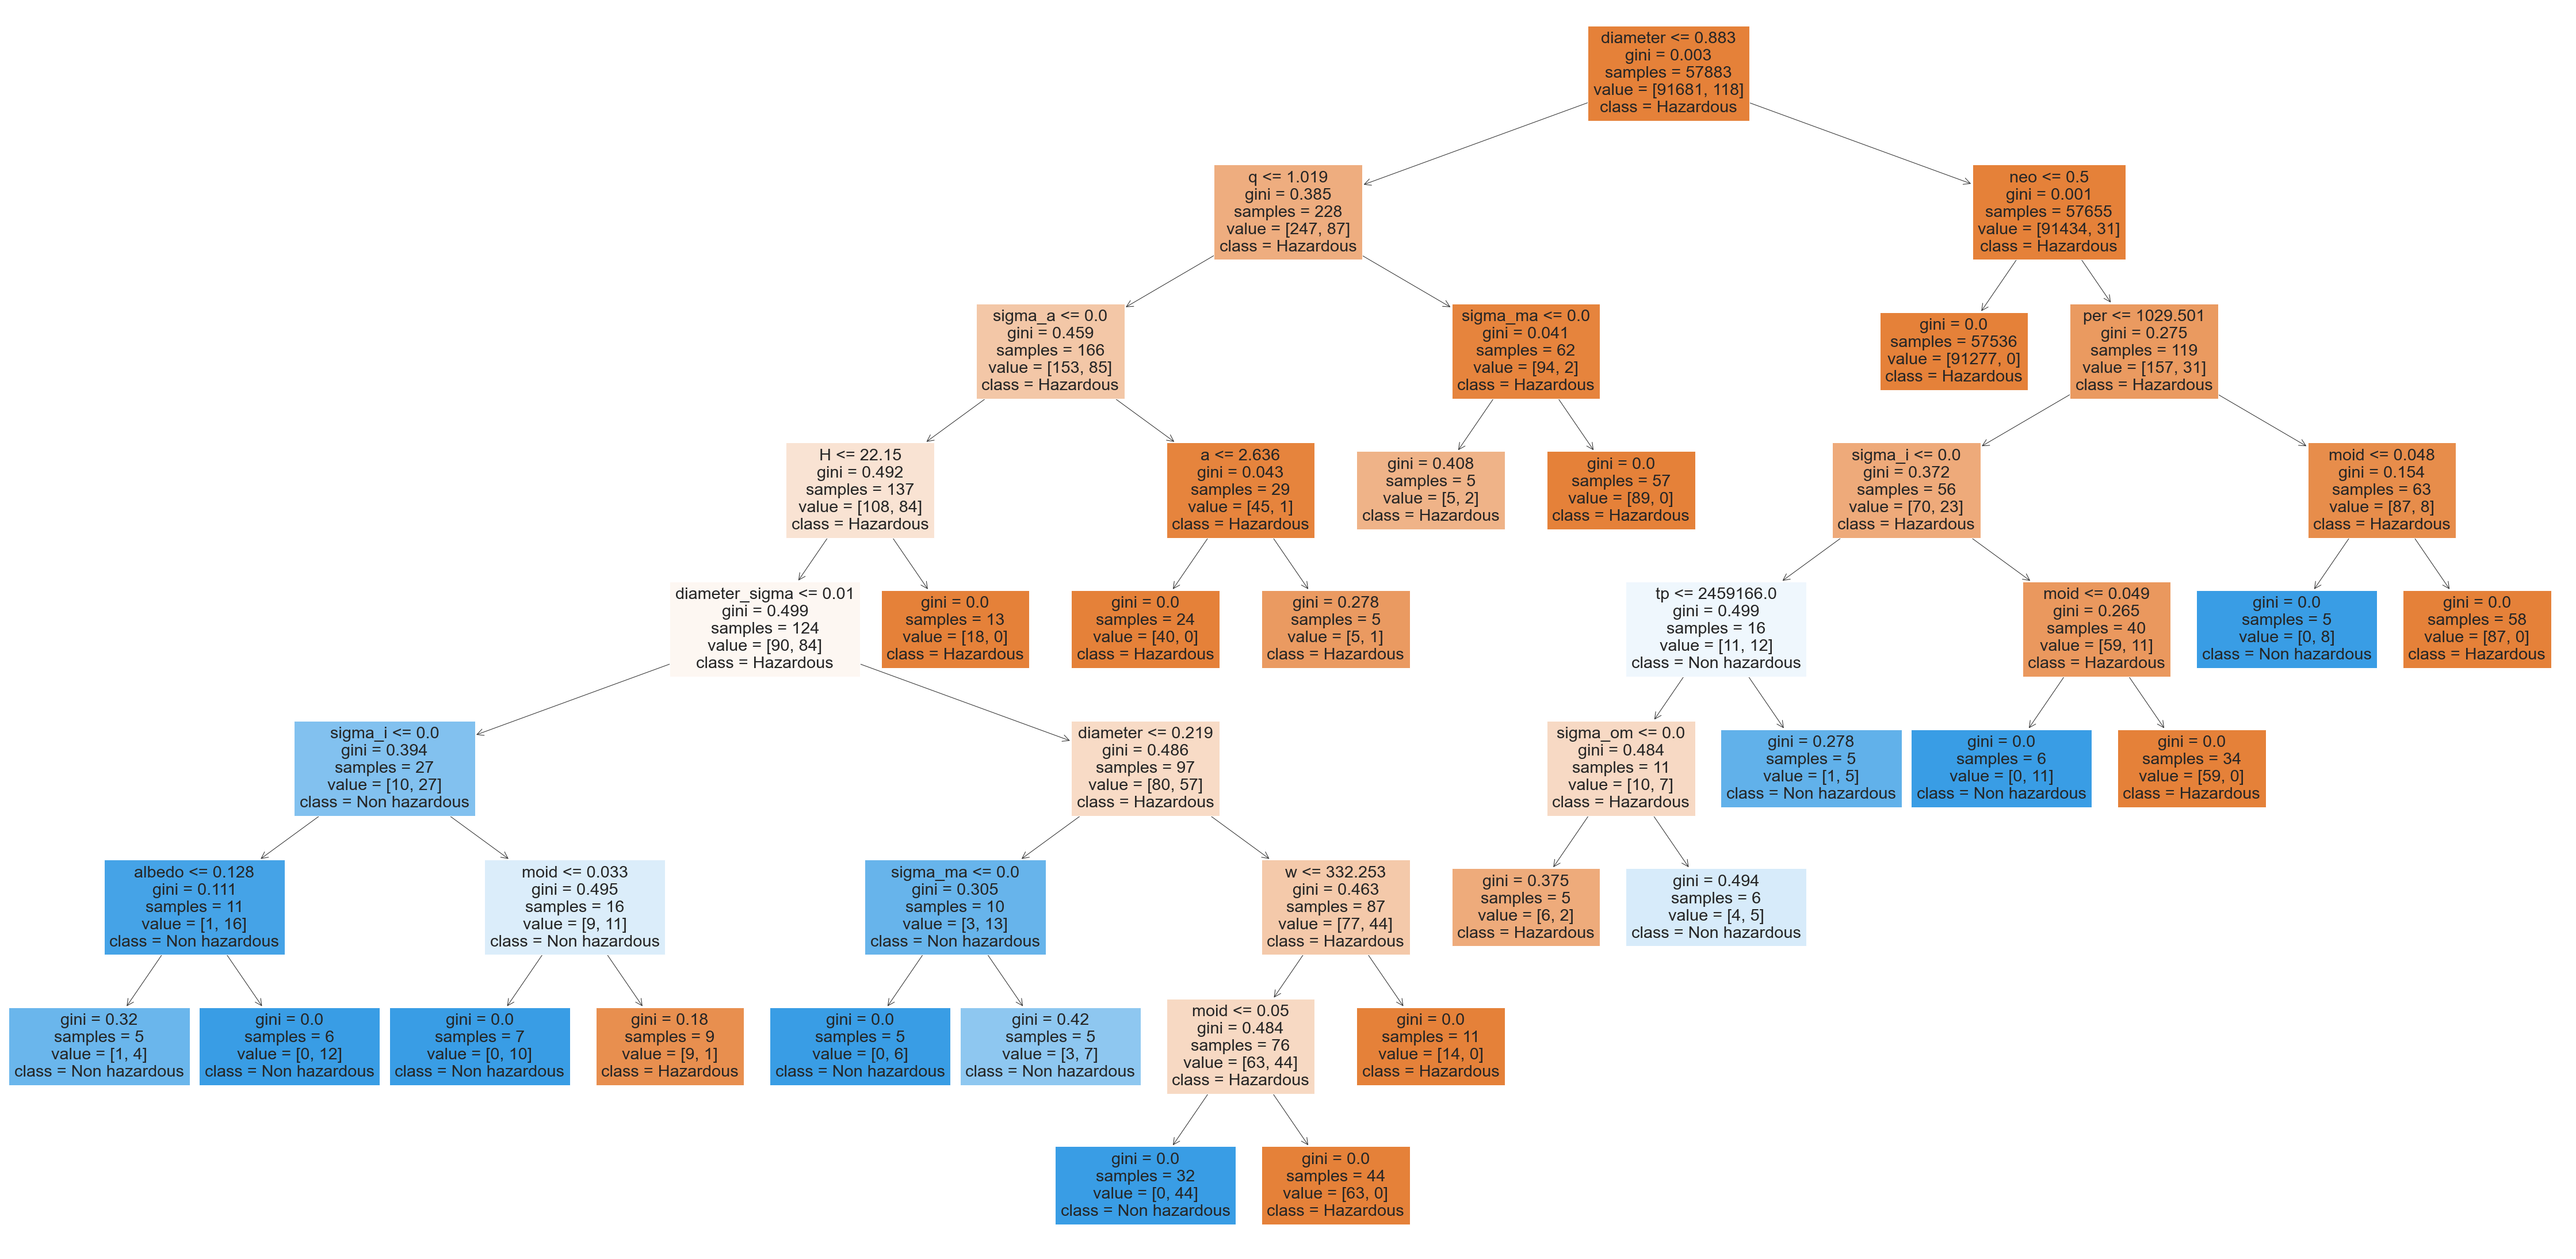

In [45]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names = X.columns, class_names=['Hazardous', "Non hazardous"], filled=True);

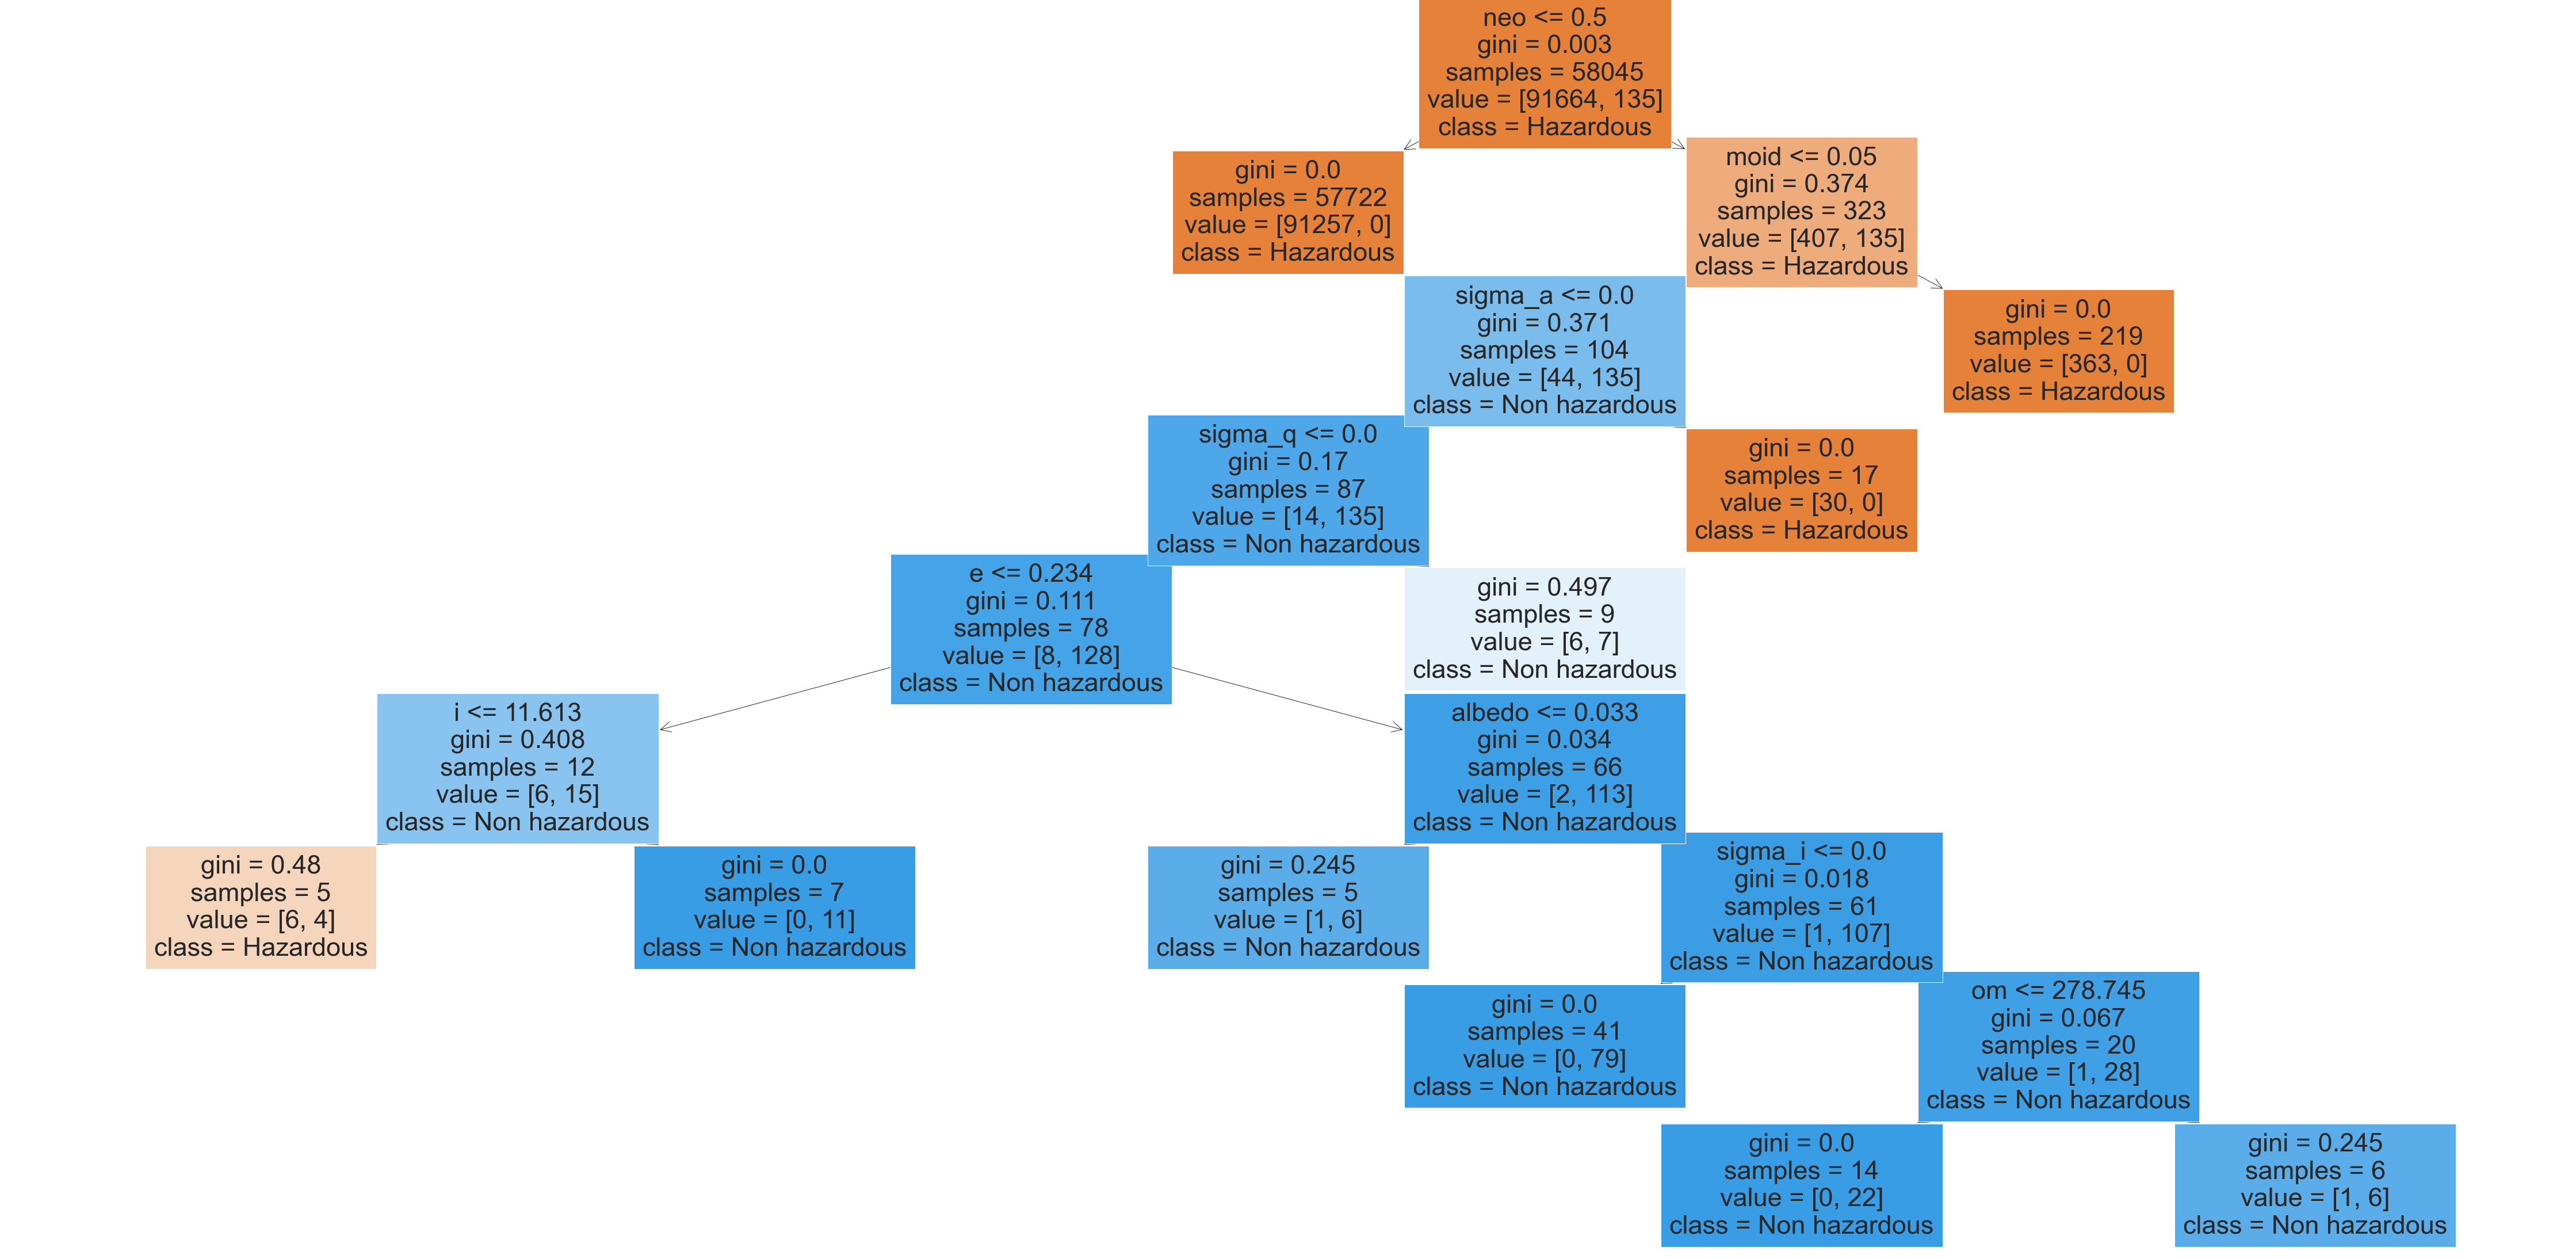

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7],feature_names = X.columns, class_names=['Hazardous', "Non hazardous"], filled=True);

In [47]:
#Sorting data by feature importance
rf_best.feature_importances_

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
17,moid,0.415507
8,q,0.094677
0,neo,0.061601
1,H,0.059753
21,sigma_i,0.044017
2,diameter,0.042037
24,sigma_ma,0.033663
7,a,0.031479
16,per,0.023168
14,n,0.021501


Decision Tree
confusion matrix: 
 [[39284     1]
 [    1    57]]


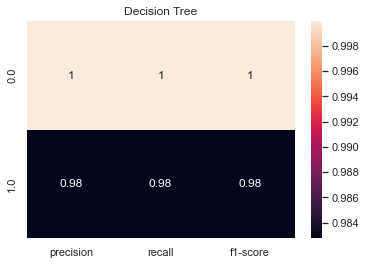


Random Forest
confusion matrix: 
 [[39284     1]
 [    4    54]]


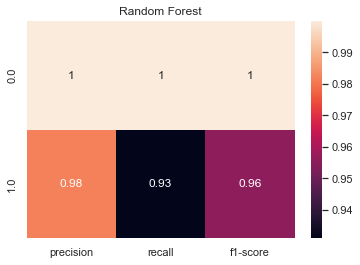


Logistic Regression
confusion matrix: 
 [[39271    14]
 [   45    13]]


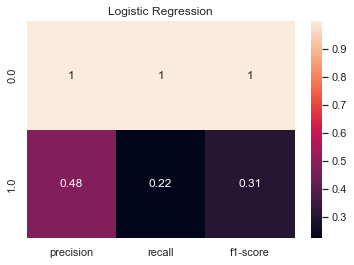


XGBoost
confusion matrix: 
 [[39285     0]
 [    0    58]]


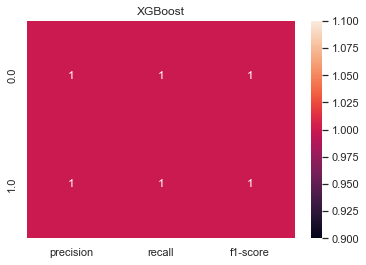

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Defining models
models = [DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0), LogisticRegression(random_state=0), XGBClassifier(random_state=0)]
names = ["Decision Tree", "Random Forest", "Logistic Regression", "XGBoost"]
results_dt = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0) # 10-fold random stratified cross-validation
acc = []
auc = []

# Getting scores for the different models
for model, name in zip(models, names):
  model = model.fit(X_train, y_train)
  pred = model.predict(X_test)
  
  cv_results = cross_val_score(model, X, y, cv=cv, scoring="roc_auc") # Storing AUC-ROC scores for plot
  results_dt.append(cv_results)

  acc.append(cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1).mean()) # Storing accuracy values
  auc.append(cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1).mean()) # Storing AUC-ROC scores

  print(name)
  print("confusion matrix: \n", metrics.confusion_matrix(y_test, pred)) # Confusion matrix
  
  
  #Plotting classification report
  clf_report = classification_report(y_test, pred, output_dict=True)
  plt.figure()
  plt.title(name)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T, annot=True)
  plt.show()

  print() 

             Algorithm  Accuracy Score  AUC-ROC Score
0        Decision Tree        0.999942       0.985371
1        Random Forest        0.999921       0.999995
2  Logistic Regression        0.998490       0.932295
3              XGBoost        0.999964       0.999993


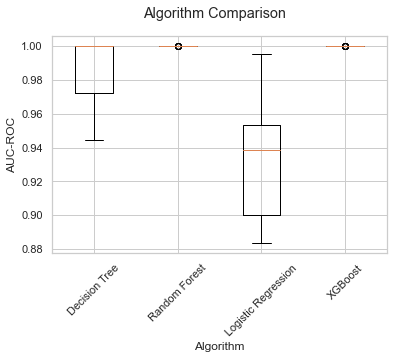

In [41]:
# Accuracy and AUC-ROC Scores
scores = pd.DataFrame(list(zip(names, acc, auc)), columns =["Algorithm", "Accuracy Score", "AUC-ROC Score"]) 
print(scores)

# Plotting AUC-ROC
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_dt)
plt.xlabel('Algorithm')
plt.ylabel('AUC-ROC')
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()

Creating XGBoost Model

In [40]:
from sklearn.metrics import accuracy_score

xgbmodel = XGBClassifier()

#Fitting
xgbmodel.fit(X_train, y_train)

#Predict
preds = xgbmodel.predict(X_test)

#Accuracy score
print(accuracy_score(y_test, preds))

1.0


In [42]:
#Testing the accuracy of the XGBoost model
from sklearn.metrics import classification_report
target_names = ['No risk', 'PHA']
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

     No risk       1.00      1.00      1.00     39285
         PHA       1.00      1.00      1.00        58

    accuracy                           1.00     39343
   macro avg       1.00      1.00      1.00     39343
weighted avg       1.00      1.00      1.00     39343

